In [1]:
pip install yfinance matplotlib seaborn pandas


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the list of tickers and the time period
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2021-01-01'
end_date = '2024-01-01'

# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)

# Select adjusted close prices for further analysis
adj_close = data['Adj Close']

[*********************100%%**********************]  4 of 4 completed


#Visualization 1

####


*   This plot shows the time series of the adjusted close prices of the selected stocks.
*   It helps to visualize the overall trend and volatility of the stock prices over the given period.

####

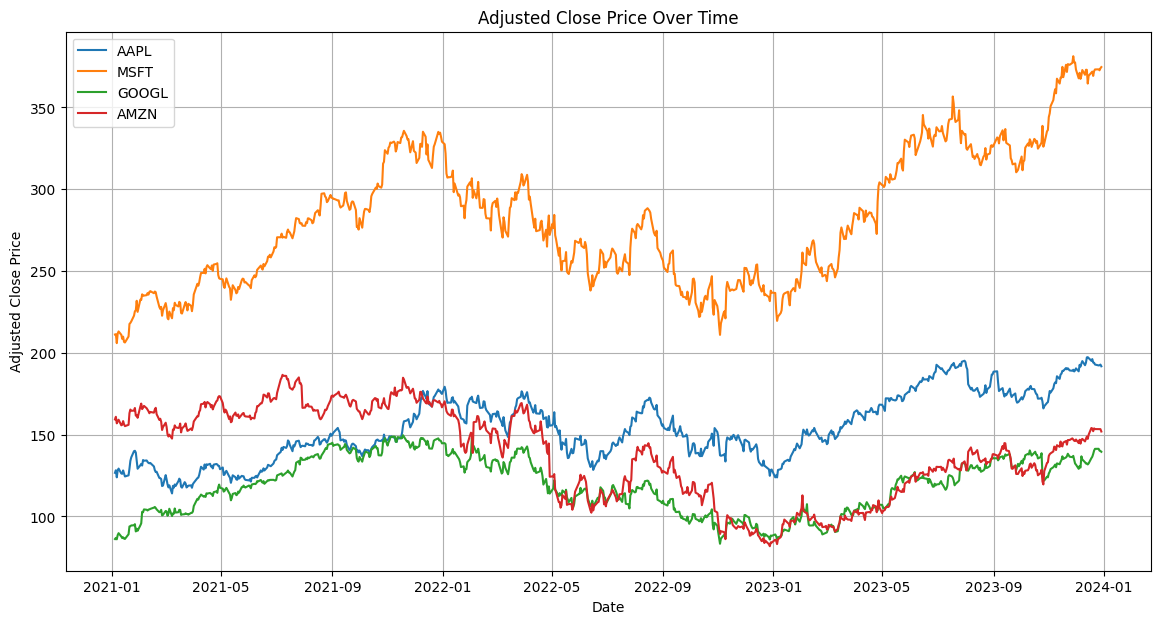

In [3]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(adj_close.index, adj_close[ticker], label=ticker)
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Visualization 2: Daily Returns

####

*   This plot shows the daily returns of each stock, providing insight into the day-to-day volatility.
*   It's helpful for identifying periods of high volatility or relative stability.


####

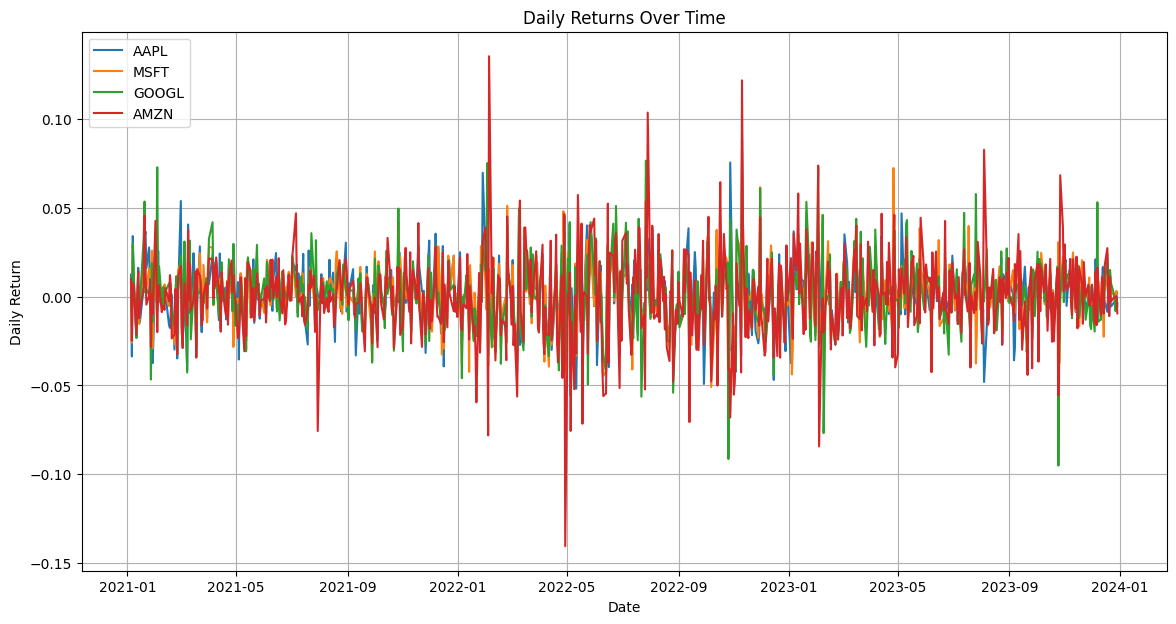

In [4]:
daily_returns = adj_close.pct_change().dropna()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualization 3: Correlation Heatmap of Daily Returns

####

*  The heatmap shows the correlation between the daily returns of the selected stocks.
*   A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.
*   This is useful for understanding how the stocks move relative to each other.

####

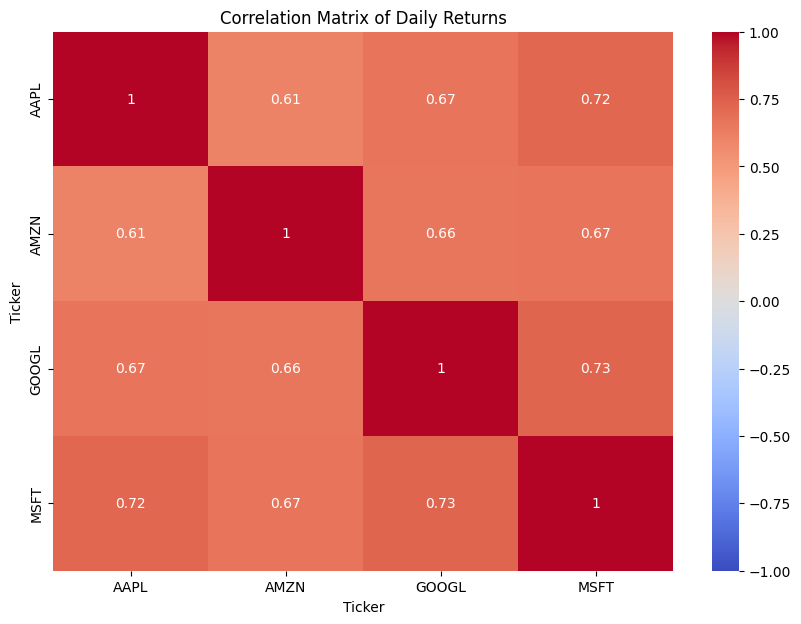

In [5]:
corr = daily_returns.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Daily Returns')
plt.show()

# Visualization 4: Rolling Mean and Standard Deviation (Volatility)

####


*   The first plot shows the 30-day rolling mean (a simple moving average) for each stock, which helps smooth out short-term fluctuations and highlight longer-term trends.


####

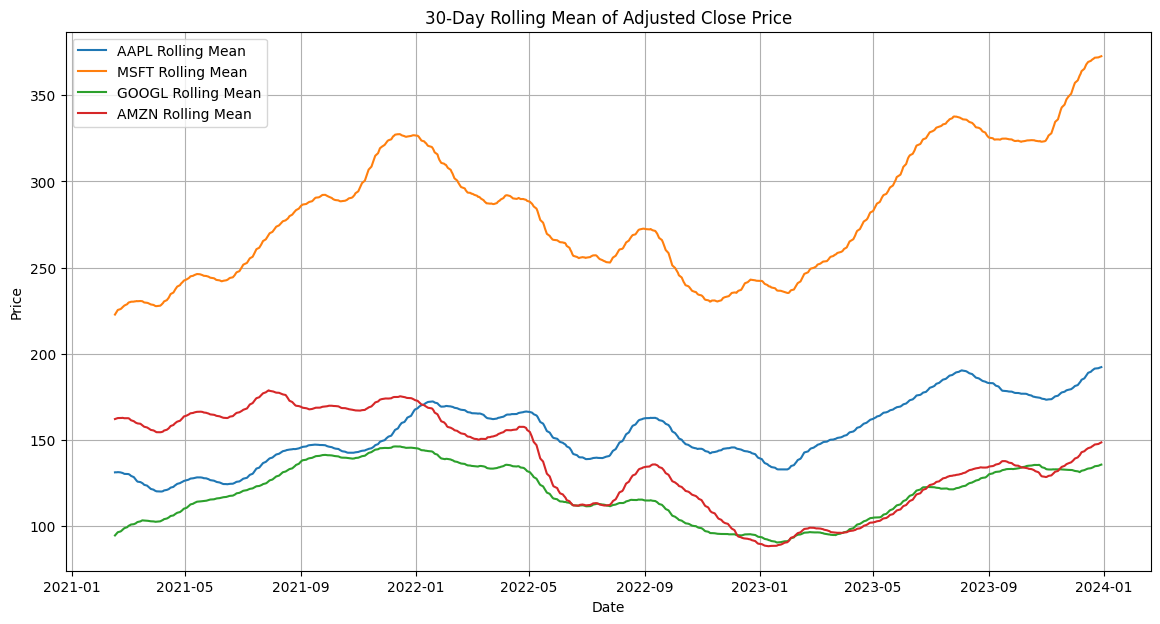

In [6]:
window = 30  # 30-day window
rolling_mean = adj_close.rolling(window=window).mean()
rolling_std = adj_close.rolling(window=window).std()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_mean.index, rolling_mean[ticker], label=f'{ticker} Rolling Mean')
plt.title(f'{window}-Day Rolling Mean of Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

####


*   The second plot shows the 30-day rolling standard deviation, which is a measure of volatility, indicating how much the stock price has varied over the 30-day period.


####

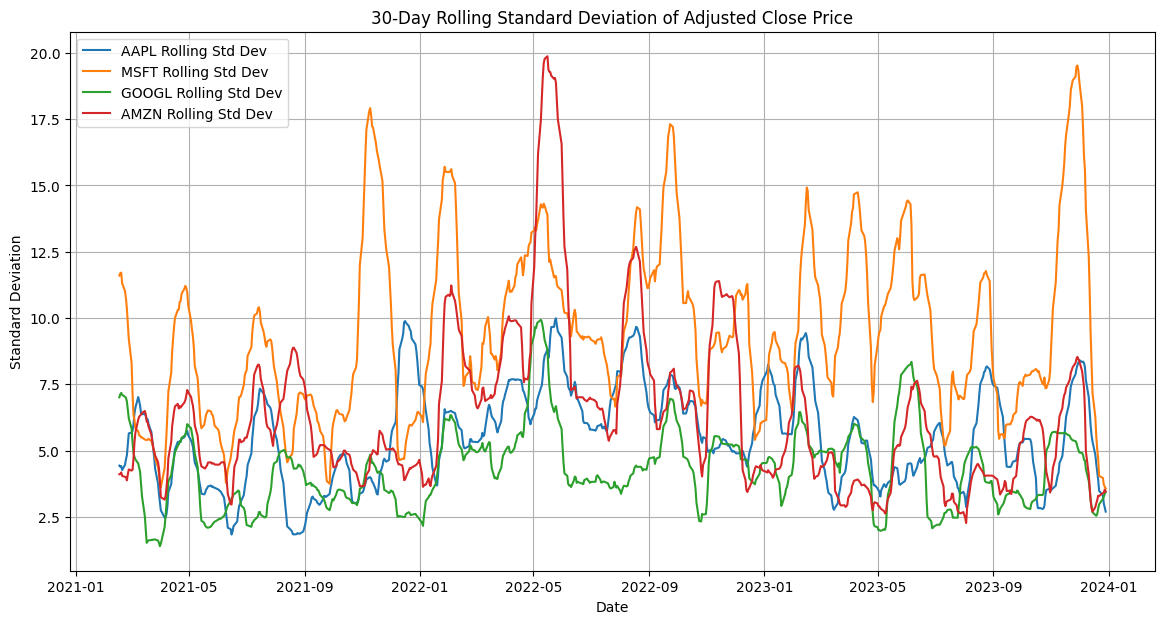

In [7]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_std.index, rolling_std[ticker], label=f'{ticker} Rolling Std Dev')
plt.title(f'{window}-Day Rolling Standard Deviation of Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualization 5: Distribution of Daily Returns

####


*    This plot shows the distribution of daily returns for each stock.

*   It is useful for identifying the overall shape of the returns (e.g., whether they are normally distributed) and the presence of outliers.


####

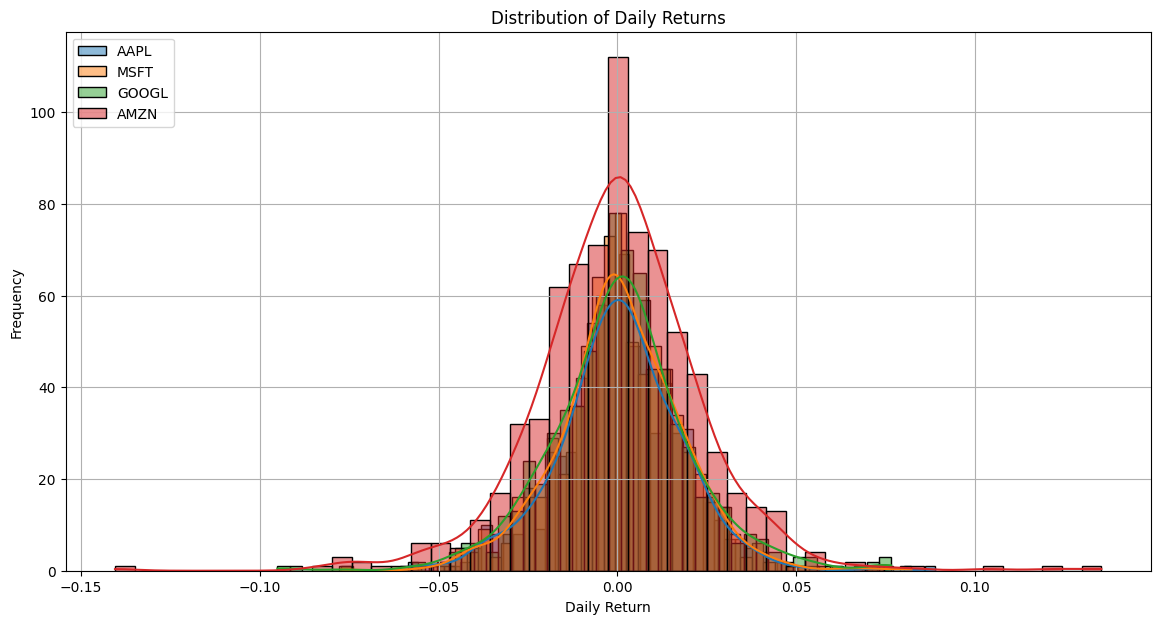

In [8]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    sns.histplot(daily_returns[ticker], kde=True, label=ticker, bins=50)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualization 6: Cumulative Returns

####


*   The cumulative returns plot shows how an initial investment of 1 unit would have grown over time, assuming the profits were reinvested.
*   It's useful for comparing the overall performance of different stocks over the same period.



####

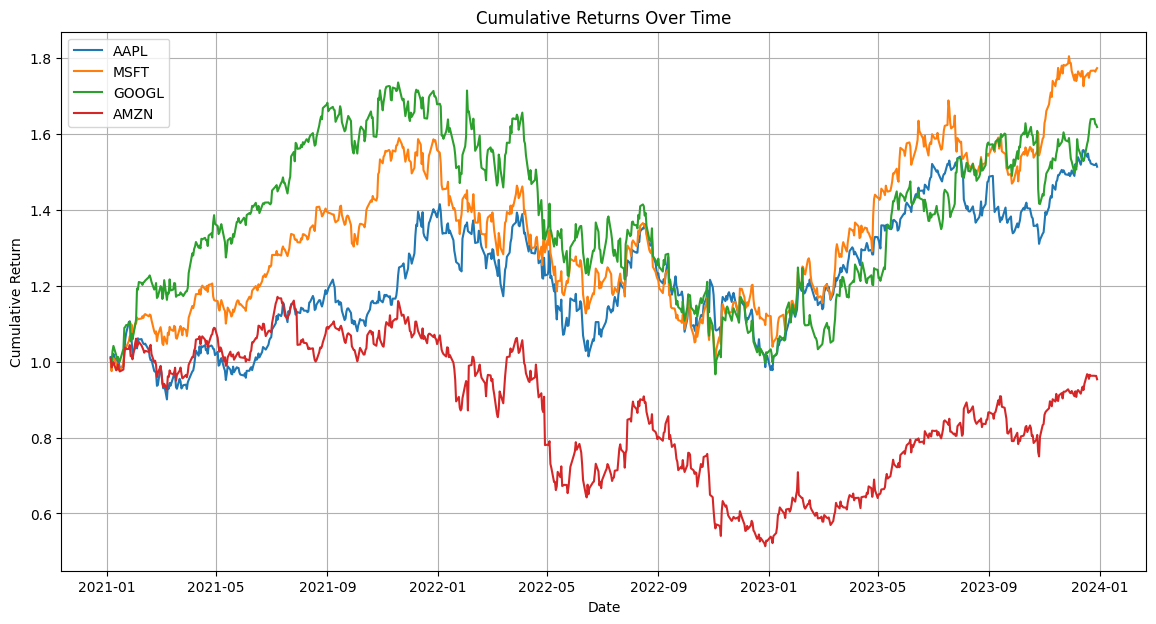

In [9]:
cumulative_returns = (1 + daily_returns).cumprod()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()



# Visualization 7: Simple Moving Average (SMA) and Exponential Moving Average (EMA)

####

*   This plot shows both the Simple Moving Average (SMA) and Exponential Moving Average (EMA) for each stock.
*   The SMA is the unweighted mean of the previous n data points, while the EMA gives more weight to recent data points.
*   These averages are useful for identifying trends and potential buy/sell signals.
*   Simple Moving Average (SMA) and Exponential Moving Average (EMA) are commonly used indicators to smooth out price data and identify trends over time.

####

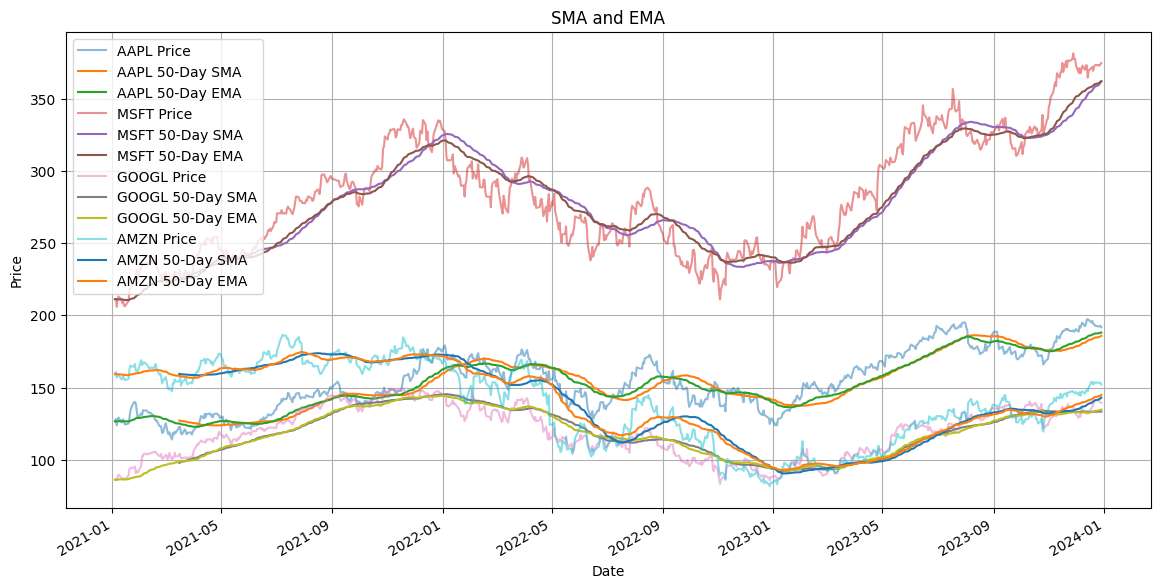

In [10]:
window_sma = 50  # 50-day SMA
window_ema = 50  # 50-day EMA

plt.figure(figsize=(14, 7))
for ticker in tickers:
    adj_close[ticker].plot(label=f'{ticker} Price', alpha=0.5)
    adj_close[ticker].rolling(window=window_sma).mean().plot(label=f'{ticker} {window_sma}-Day SMA')
    adj_close[ticker].ewm(span=window_ema, adjust=False).mean().plot(label=f'{ticker} {window_ema}-Day EMA')
plt.title('SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Visualization 8: Bollinger Bands

####


*   Bollinger Bands consist of a middle band (SMA) and two outer bands (standard deviations above and below the SMA).
*   This plot helps in assessing the volatility of the stock: prices near the upper band suggest overbought conditions, while prices near the lower band suggest oversold conditions.
*   Bollinger Bands are a popular technical analysis tool that includes a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average.


####

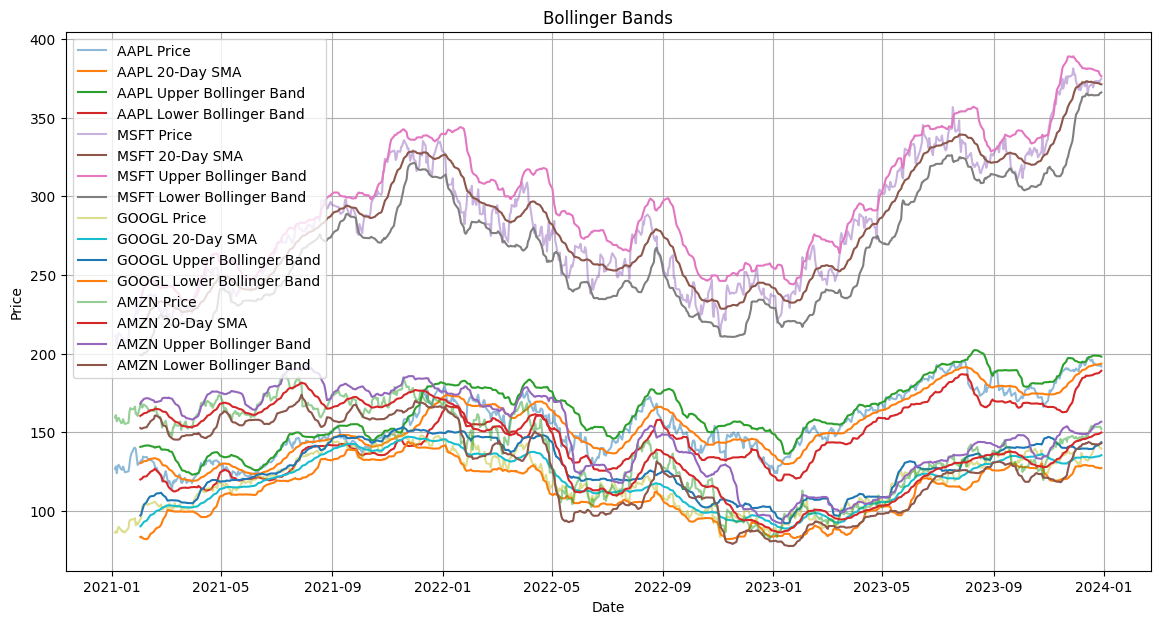

In [11]:
window_bb = 20  # 20-day SMA for Bollinger Bands

plt.figure(figsize=(14, 7))
for ticker in tickers:
    sma = adj_close[ticker].rolling(window=window_bb).mean()
    std = adj_close[ticker].rolling(window=window_bb).std()
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)

    plt.plot(adj_close[ticker], label=f'{ticker} Price', alpha=0.5)
    plt.plot(sma, label=f'{ticker} {window_bb}-Day SMA')
    plt.plot(upper_band, label=f'{ticker} Upper Bollinger Band')
    plt.plot(lower_band, label=f'{ticker} Lower Bollinger Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualization 9: Relative Strength Index (RSI)

####


*   The RSI plot helps in identifying potential reversal points: an RSI above 70 typically indicates that the stock is overbought (potential sell signal), while an RSI below 30 suggests that the stock is oversold (potential buy signal).


####

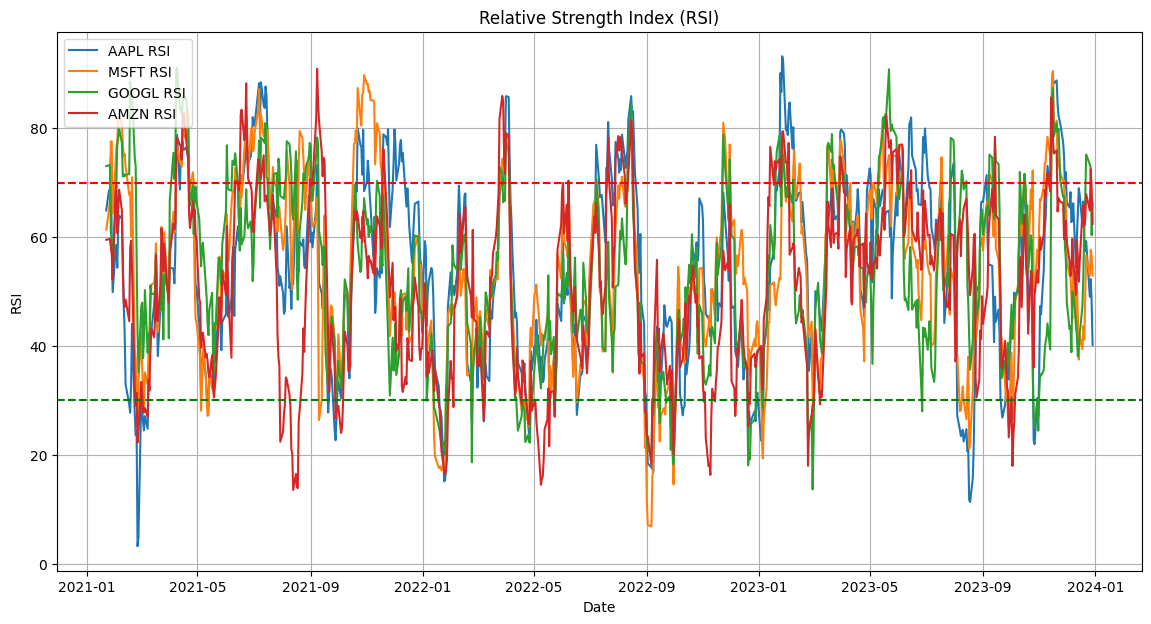

In [12]:
def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

plt.figure(figsize=(14, 7))
for ticker in tickers:
    rsi = calculate_rsi(adj_close[ticker])
    plt.plot(rsi, label=f'{ticker} RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualization 10: MACD (Moving Average Convergence Divergence)

####


*   The MACD plot shows the difference between the short-term EMA and the long-term EMA.
*   The Signal Line is a moving average of the MACD itself.
*   Crossovers between the MACD and Signal Line can indicate potential buy or sell signals.


####

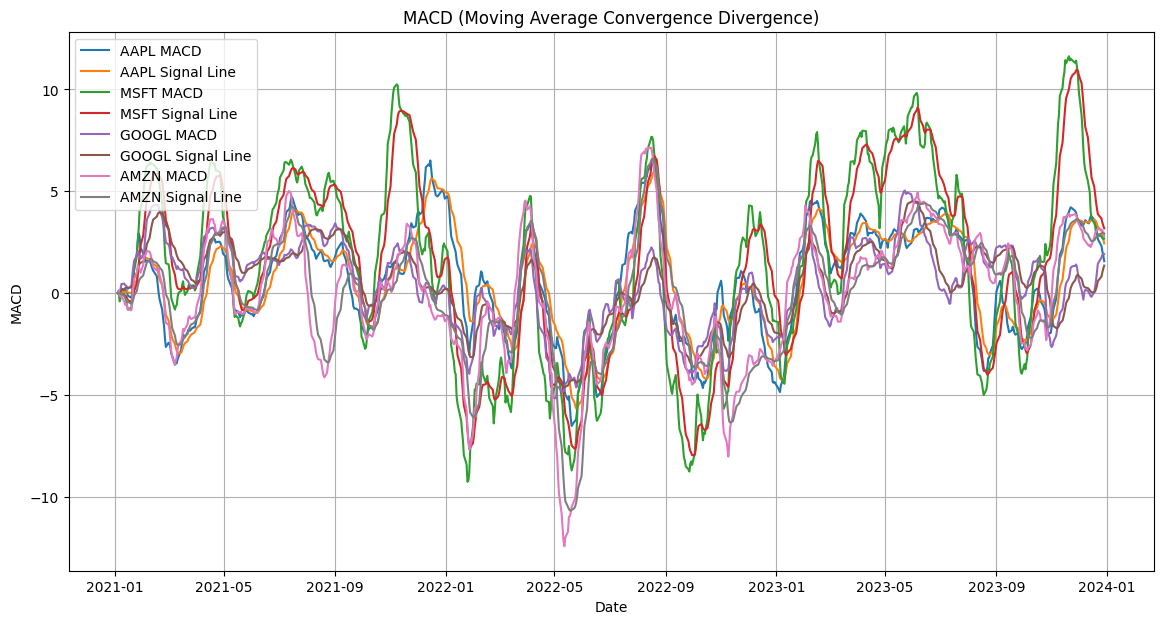

In [13]:

short_window = 12
long_window = 26
signal_window = 9

plt.figure(figsize=(14, 7))
for ticker in tickers:
    exp1 = adj_close[ticker].ewm(span=short_window, adjust=False).mean()
    exp2 = adj_close[ticker].ewm(span=long_window, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    plt.plot(macd, label=f'{ticker} MACD')
    plt.plot(signal, label=f'{ticker} Signal Line')
plt.title('MACD (Moving Average Convergence Divergence)')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Visualization 11: Candlestick Chart

####


*   The candlestick chart shows the open, high, low, and close prices for each period (typically a day).
*   It is useful for identifying patterns that could indicate potential reversals or continuations in the trend.


####

In [15]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


####


*   The candlestick chart shows the open, high, low, and close prices for each period (typically a day).
*   It is useful for identifying patterns that could indicate potential reversals or continuations in the trend.


####

[*********************100%%**********************]  4 of 4 completed


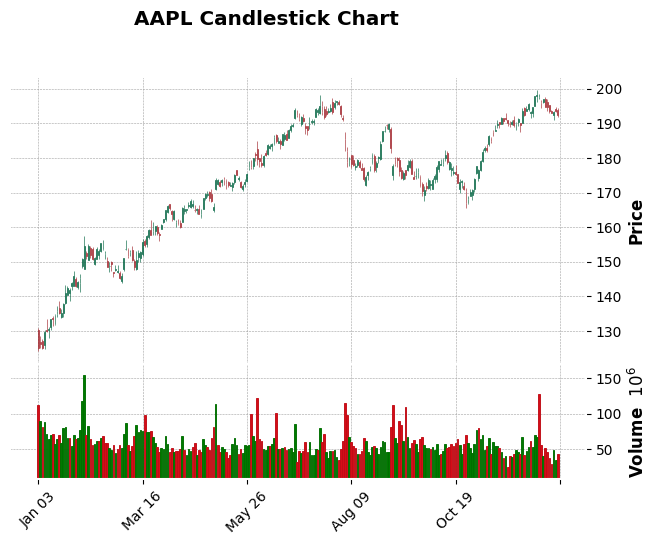

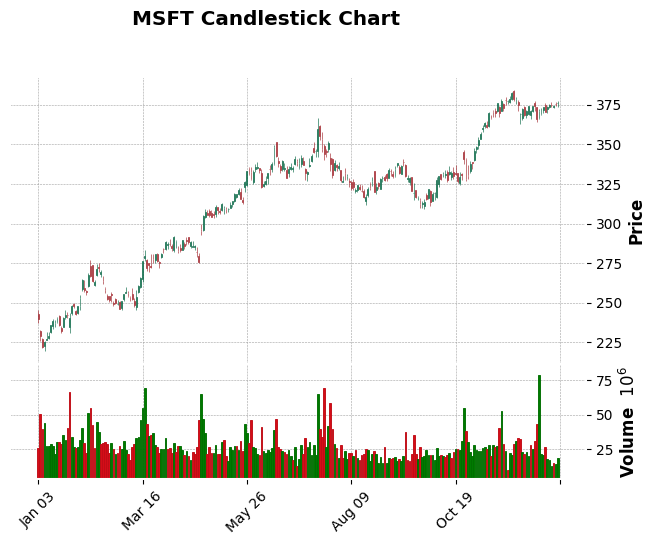

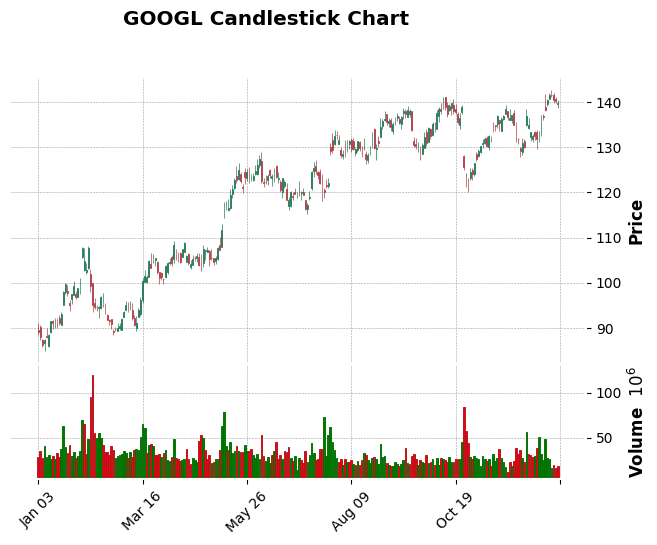

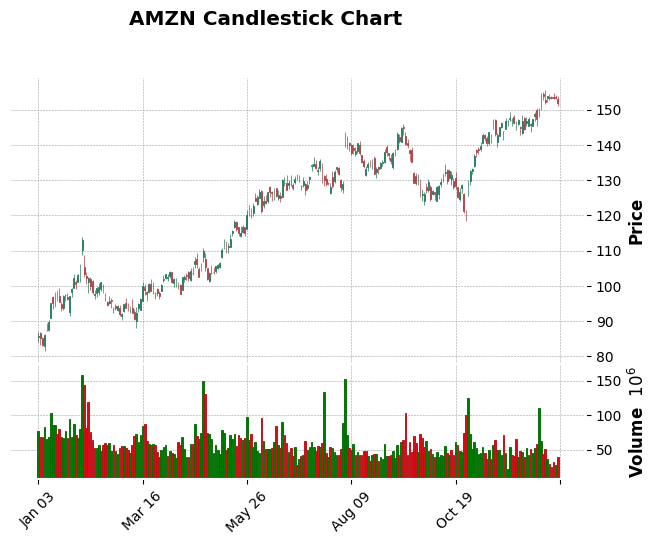

In [20]:
import yfinance as yf
import mplfinance as mpf

# Define the list of tickers and the time period
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2023-01-01'
end_date = '2024-01-01'

# Download data from Yahoo Finance with all necessary columns
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

# Visualization 11: Candlestick Chart
for ticker in tickers:
    # Extract OHLC data for each ticker
    ohlc_data = data[ticker][['Open', 'High', 'Low', 'Close', 'Volume']]

    # Plot candlestick chart
    mpf.plot(
        ohlc_data,
        type='candle',
        style='charles',
        title=f'{ticker} Candlestick Chart',
        ylabel='Price',
        volume=True)

# Visualization 12: Volume Over Time

####


*   The volume plot shows the number of shares traded over time.
*   Spikes in volume often accompany significant price movements, indicating strong investor interest.



####

[*********************100%%**********************]  4 of 4 completed


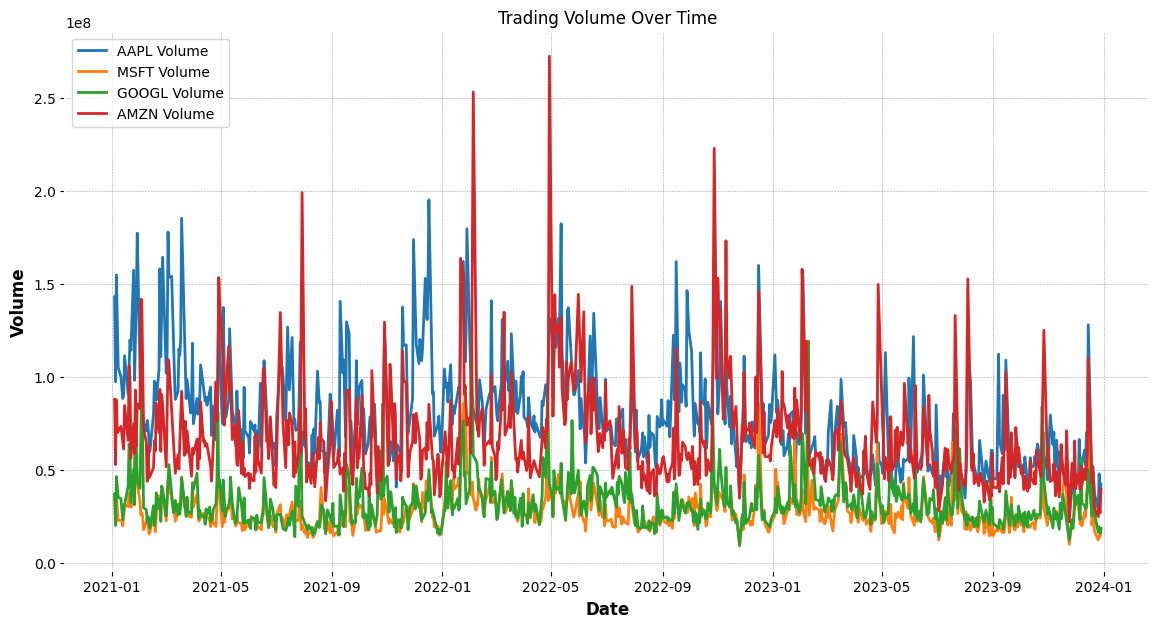

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the list of tickers and the time period
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2021-01-01'
end_date = '2024-01-01'

# Download data from Yahoo Finance with all necessary columns
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

# Visualization 12: Volume Over Time
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Volume'], label=f'{ticker} Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Visualization 13: Drawdown

####


*   The drawdown plot shows the decline from the historical peak in cumulative returns.
*   It is useful for understanding the risk of an investment by showing the potential downside.


####

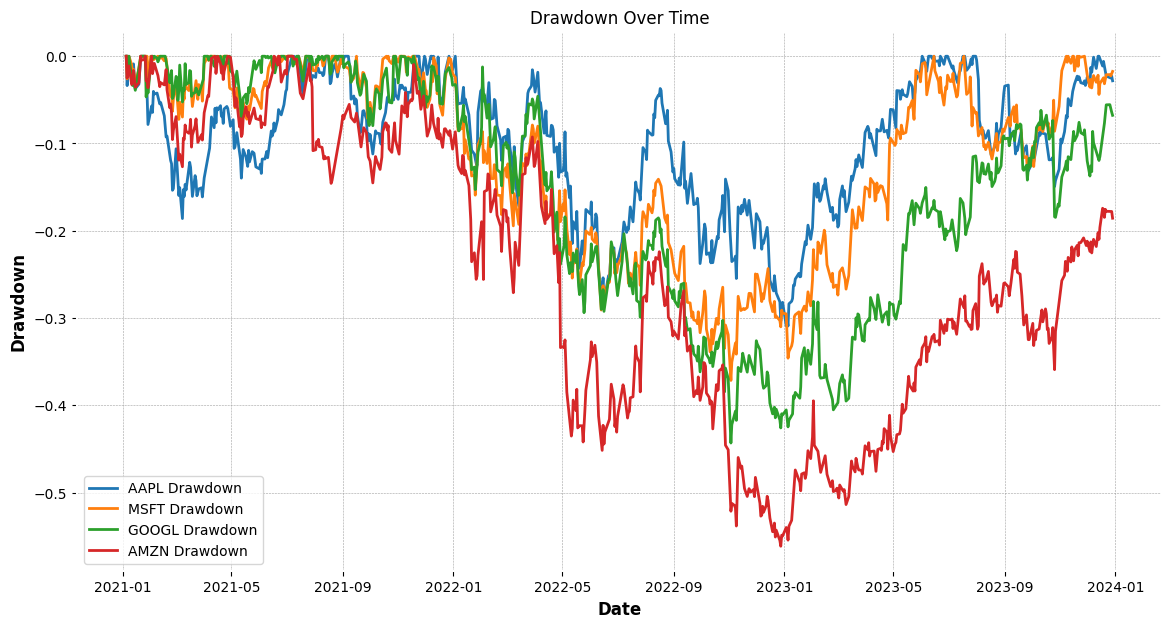

In [25]:
cumulative_returns = (1 + daily_returns).cumprod()
drawdown = cumulative_returns.div(cumulative_returns.cummax()).sub(1)

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(drawdown.index, drawdown[ticker], label=f'{ticker} Drawdown')
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


# Visualization 14: Seasonal Decomposition of Time Series (STL)

####


*   The STL decomposition breaks down the time series into trend, seasonal, and residual components.
*   This helps in understanding the underlying patterns and seasonal effects in the stock's price movement.


####

[*********************100%%**********************]  4 of 4 completed


<Figure size 1400x1000 with 0 Axes>

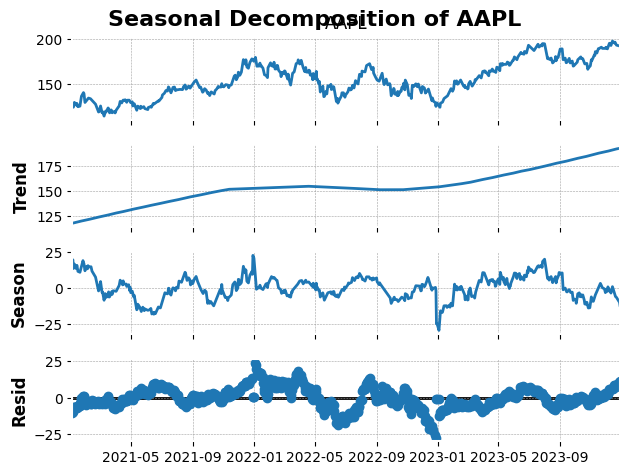

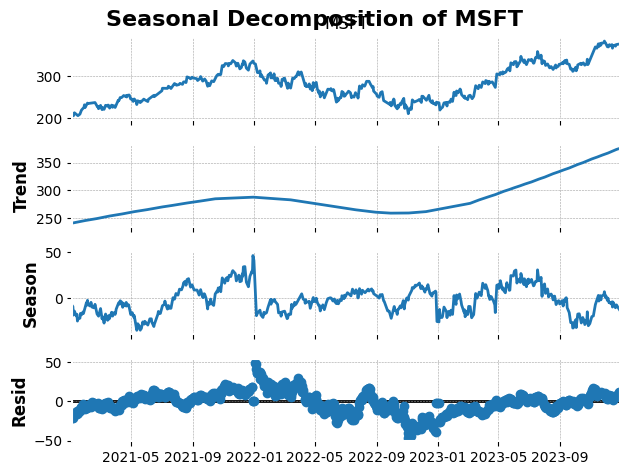

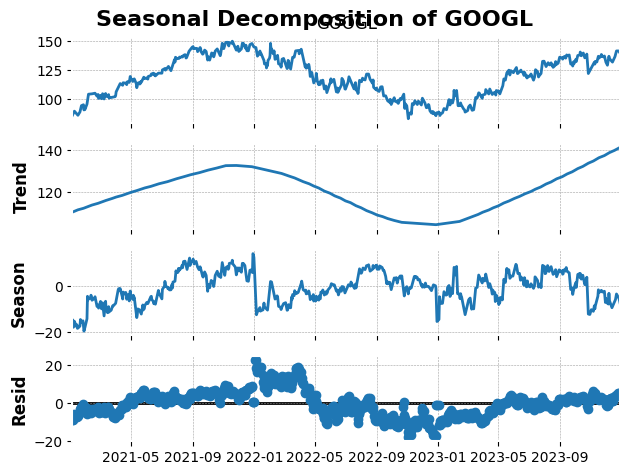

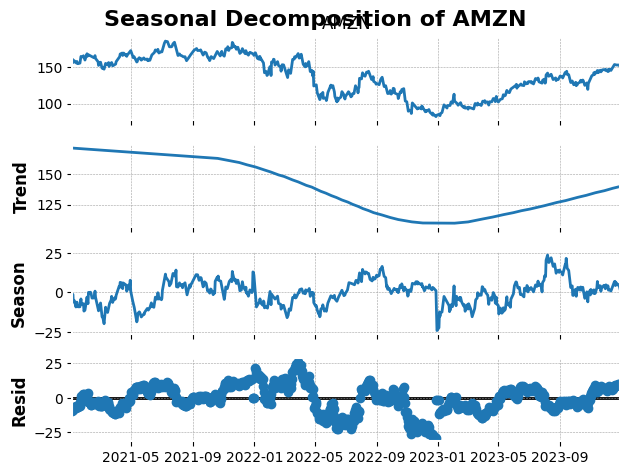

In [27]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Define the list of tickers and the time period
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2021-01-01'
end_date = '2024-01-01'

# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)
adj_close = data['Adj Close']

# Visualization: Seasonal Decomposition of Time Series (STL)
plt.figure(figsize=(14, 10))
for ticker in tickers:
    # Use a period of 252 to reflect an annual seasonality based on trading days
    stl = STL(adj_close[ticker], seasonal=13, period=252)
    result = stl.fit()

    # Plot the STL decomposition
    fig = result.plot()
    fig.suptitle(f'Seasonal Decomposition of {ticker}', fontsize=16)
    plt.show()

# Visualization 15: Autocorrelation Plot

####


*   Autocorrelation plots help in understanding the persistence of trends.
*   Significant autocorrelation at certain lags may indicate that the stock's past returns are influencing its future returns.


####

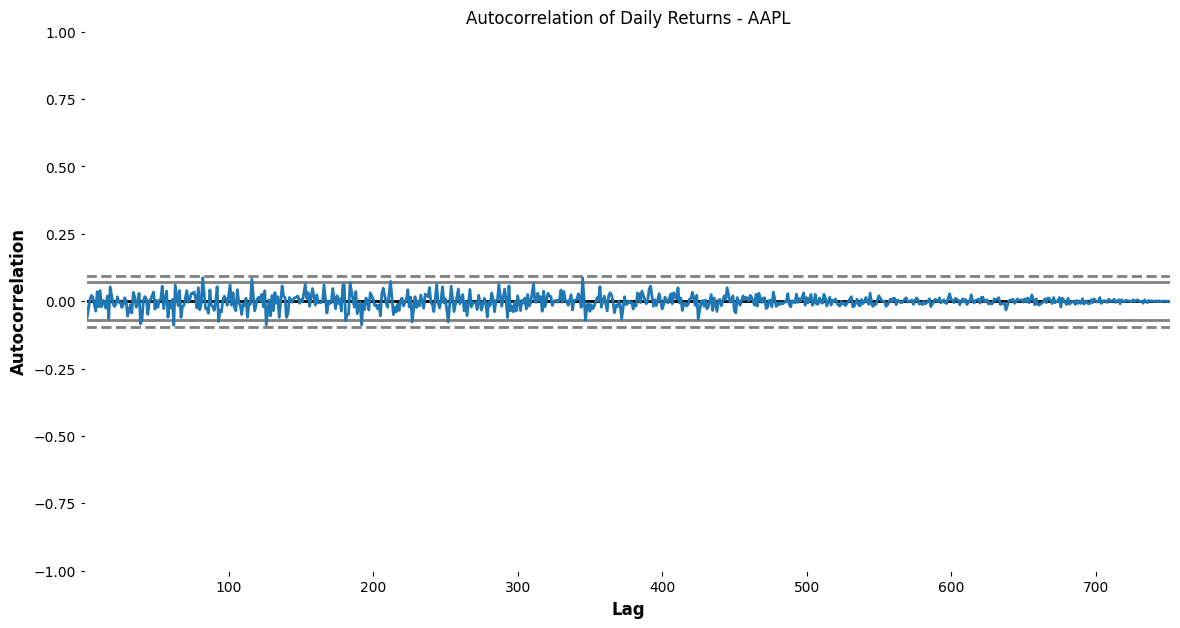

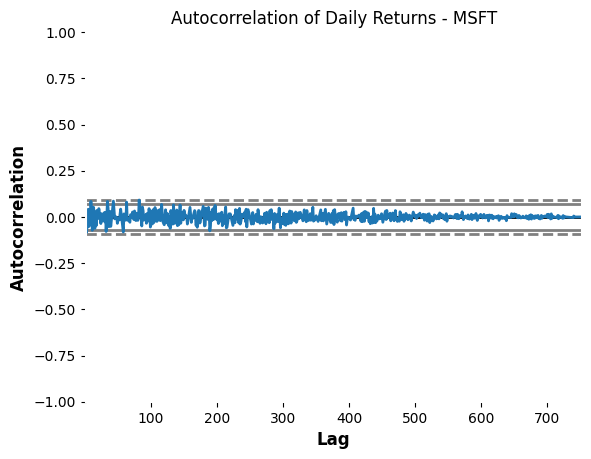

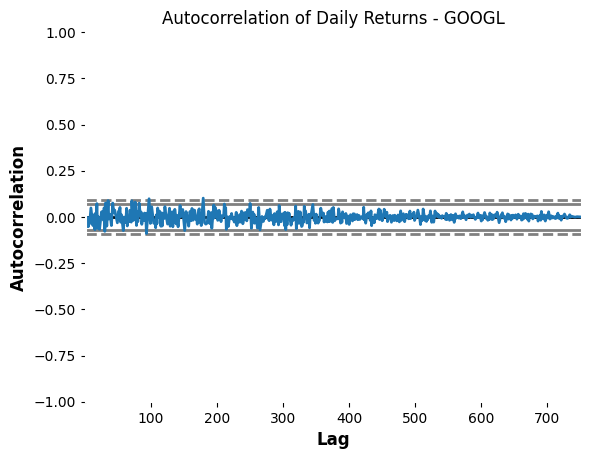

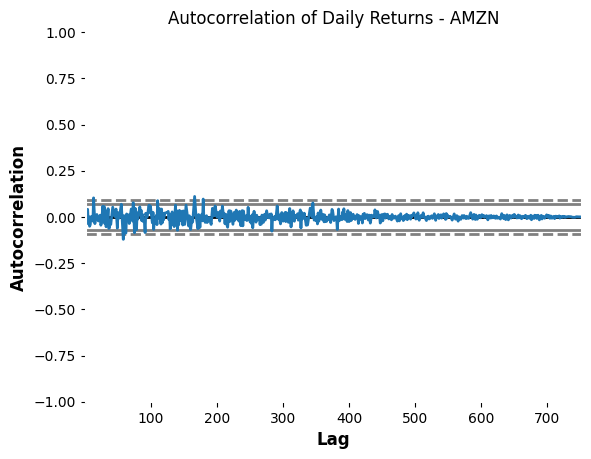

In [28]:
from pandas.plotting import autocorrelation_plot


plt.figure(figsize=(14, 7))
for ticker in tickers:
    autocorrelation_plot(daily_returns[ticker])
    plt.title(f'Autocorrelation of Daily Returns - {ticker}')
    plt.show()



# Visualization 16: MACD Histogram

####


*   The MACD histogram represents the difference between the MACD line and the signal line.
*   It helps in identifying changes in momentum: positive values indicate increasing upward momentum, while negative values indicate increasing downward momentum.
*   The MACD histogram is a visual representation of the difference between the MACD line and the signal line. It helps in identifying potential buy or sell signals.


####

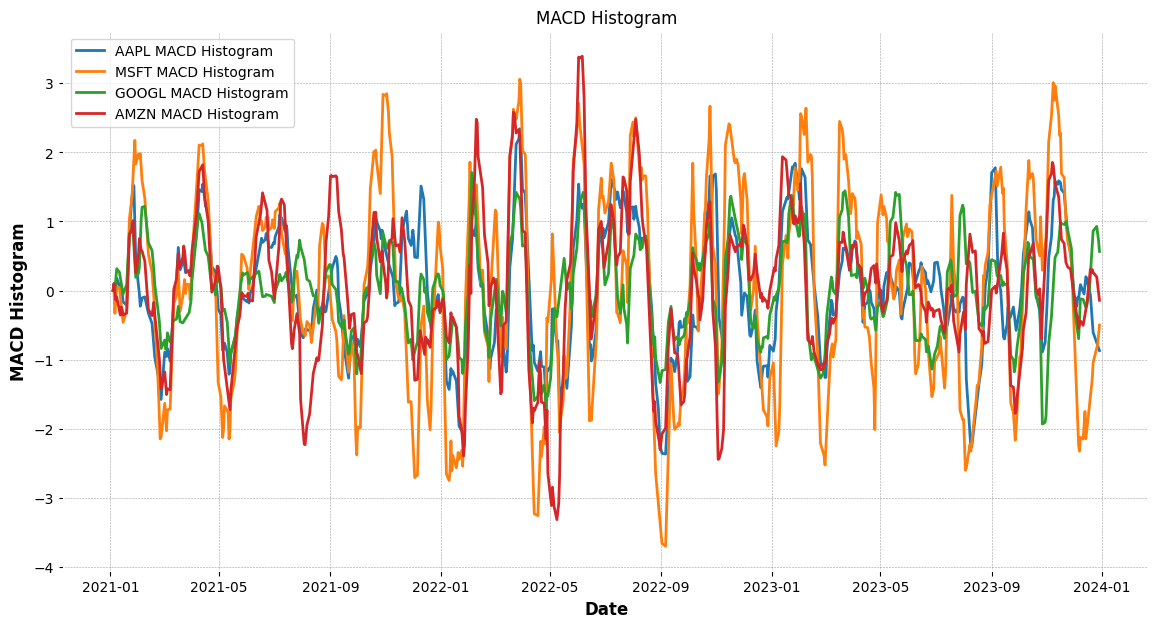

In [29]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    exp1 = adj_close[ticker].ewm(span=12, adjust=False).mean()
    exp2 = adj_close[ticker].ewm(span=26, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean()
    macd_histogram = macd - signal

    plt.plot(macd_histogram, label=f'{ticker} MACD Histogram')
plt.title('MACD Histogram')
plt.xlabel('Date')
plt.ylabel('MACD Histogram')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Visualization 17: EMA Crossovers

####


*   The EMA crossover plot shows the points where the short-term EMA crosses above (bullish signal) or below (bearish signal) the long-term EMA.
*   These crossovers are often used by traders to generate buy or sell signals.


####

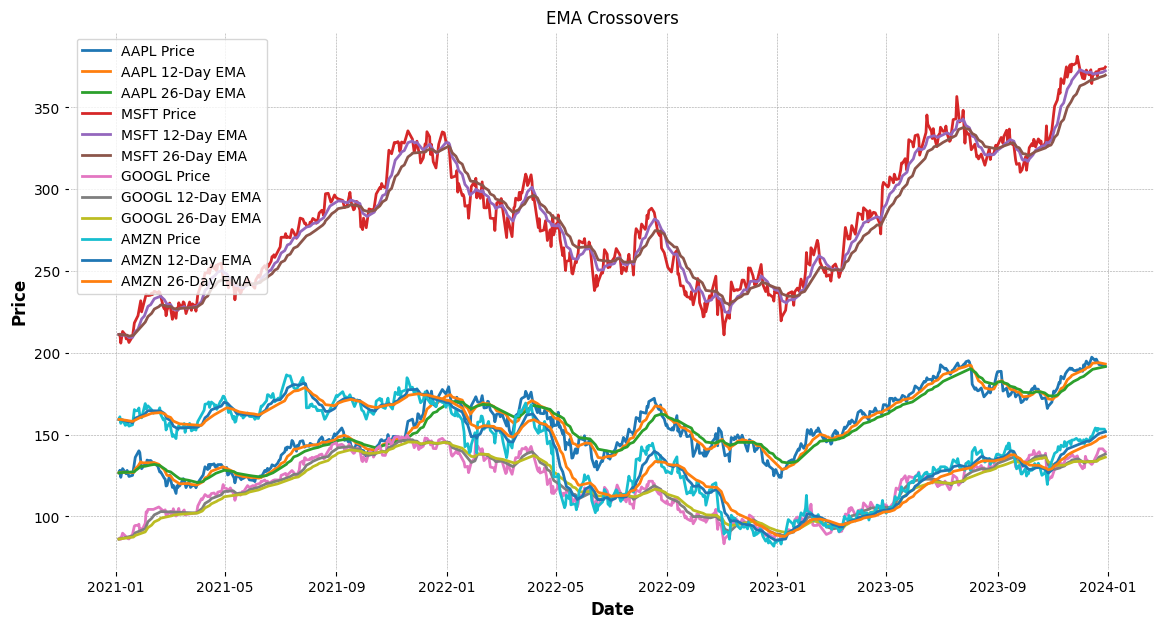

In [30]:

plt.figure(figsize=(14, 7))
for ticker in tickers:
    short_ema = adj_close[ticker].ewm(span=12, adjust=False).mean()
    long_ema = adj_close[ticker].ewm(span=26, adjust=False).mean()

    plt.plot(adj_close[ticker], label=f'{ticker} Price')
    plt.plot(short_ema, label=f'{ticker} 12-Day EMA')
    plt.plot(long_ema, label=f'{ticker} 26-Day EMA')
plt.title('EMA Crossovers')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Visualization 18: On-Balance Volume (OBV)

####


*   OBV is calculated by adding the volume on up days and subtracting it on down days.
*   It helps in identifying whether volume is confirming a price trend: a rising OBV indicates that volume is supporting the price increase.


####

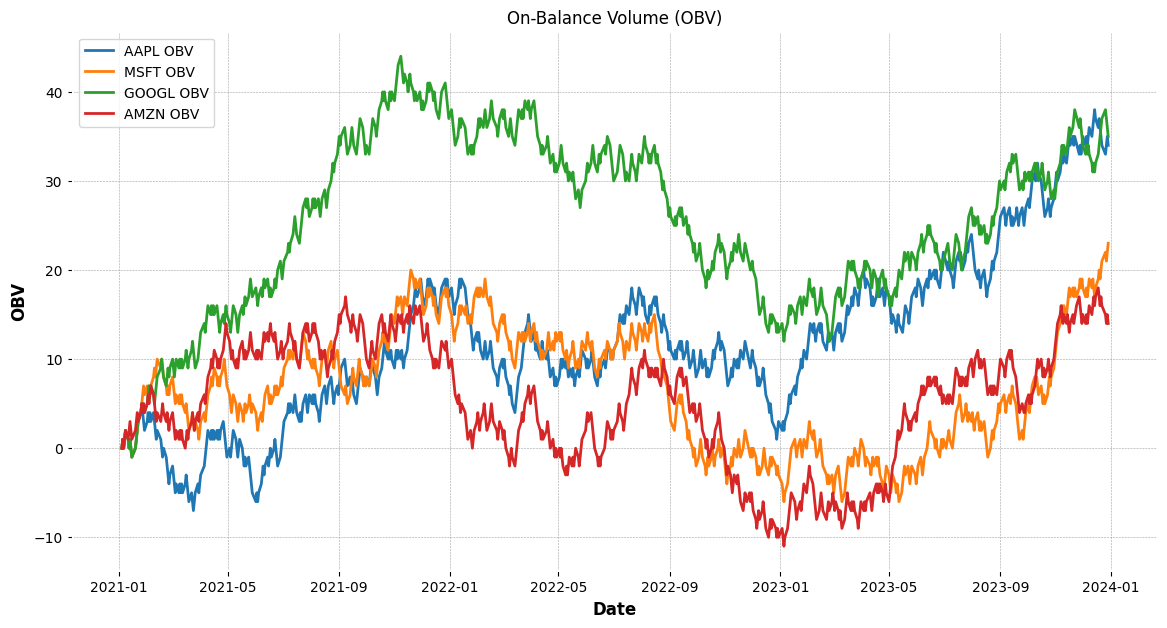

In [32]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    obv = (adj_close[ticker].diff() > 0).astype(int).sub((adj_close[ticker].diff() < 0).astype(int)).cumsum()

    plt.plot(obv, label=f'{ticker} OBV')
plt.title('On-Balance Volume (OBV)')
plt.xlabel('Date')
plt.ylabel('OBV')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualization 19: Price Relative to Market (Relative Strength)

####


*   The relative strength plot shows how a stock is performing relative to the broader market (e.g., S&P 500).
*   If the line is rising, the stock is outperforming the market; if it's falling, the stock is underperforming.


####

[*********************100%%**********************]  1 of 1 completed


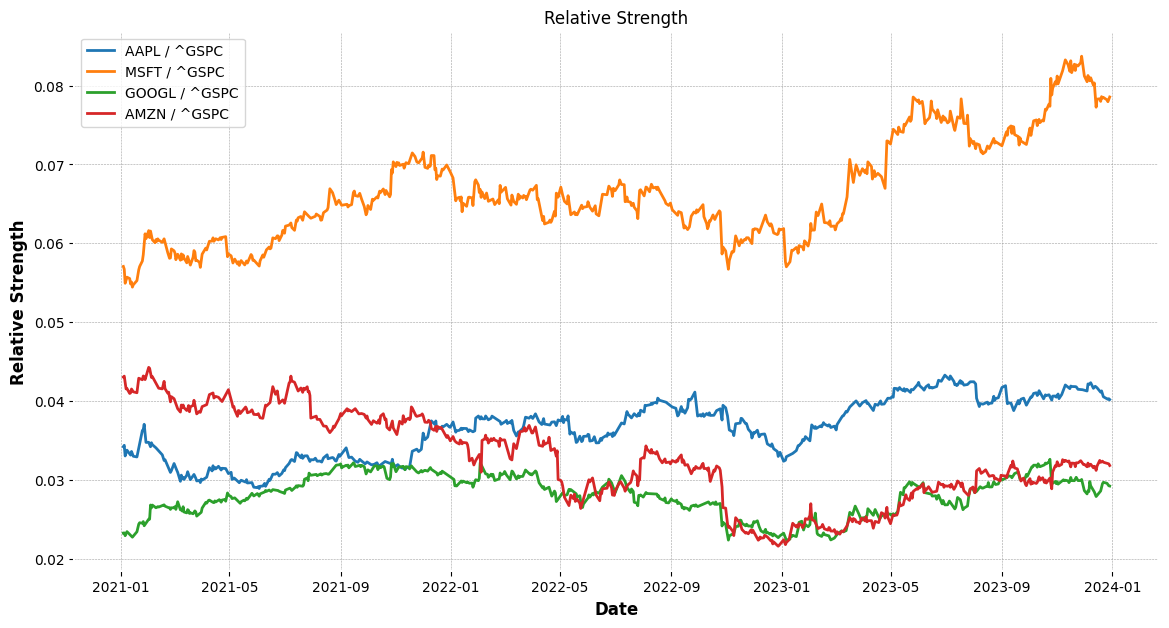

In [33]:

market_ticker = '^GSPC'  # S&P 500 index
market_data = yf.download(market_ticker, start=start_date, end=end_date)['Adj Close']

plt.figure(figsize=(14, 7))
for ticker in tickers:
    relative_strength = adj_close[ticker] / market_data

    plt.plot(relative_strength, label=f'{ticker} / {market_ticker}')
plt.title('Relative Strength')
plt.xlabel('Date')
plt.ylabel('Relative Strength')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


# Visualization 20: Sharpe Ratio Over Time

####


*   The Sharpe Ratio plot shows the risk-adjusted return of each stock over time.
*   A higher Sharpe Ratio indicates better risk-adjusted performance, while a lower ratio indicates worse performance.


####

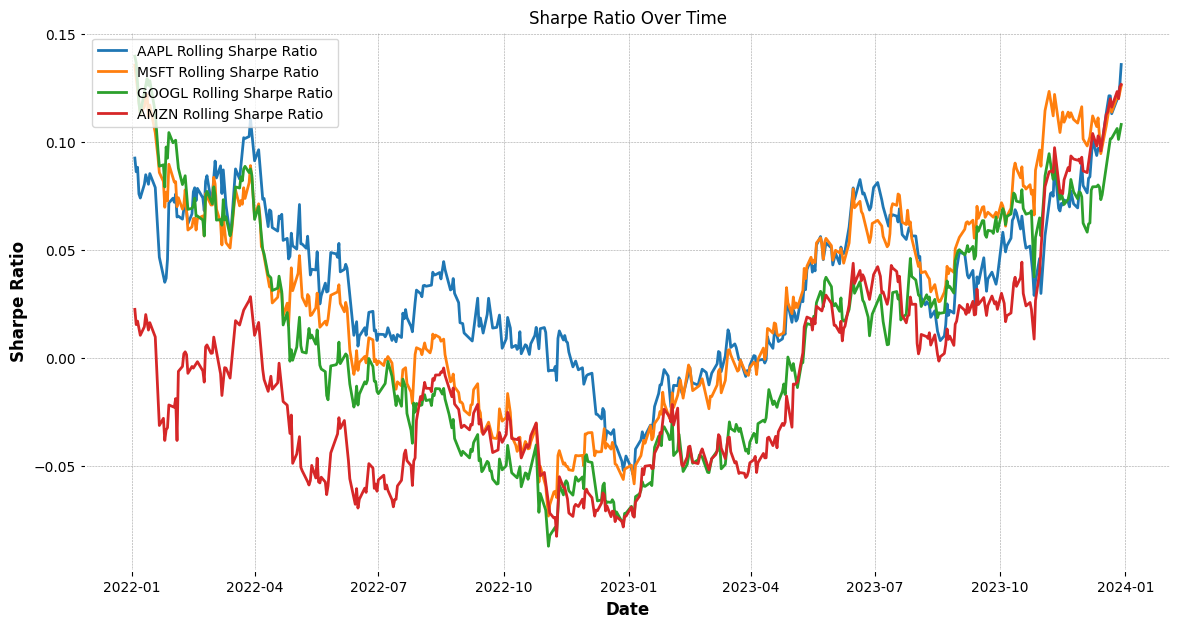

In [34]:
import numpy as np

plt.figure(figsize=(14, 7))
risk_free_rate = 0.01  # Assume a risk-free rate of 1%

for ticker in tickers:
    excess_returns = daily_returns[ticker] - risk_free_rate / 252
    rolling_sharpe = excess_returns.rolling(window=252).mean() / excess_returns.rolling(window=252).std()

    plt.plot(rolling_sharpe, label=f'{ticker} Rolling Sharpe Ratio')
plt.title('Sharpe Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()



# Visualization 21: Risk-Return Scatter Plot

####


*   This scatter plot shows the relationship between risk (volatility) and return for each stock.
*   It is used to visualize which stocks provide the best returns for the level of risk they carry.


####

<ipython-input-35-3aa670b088a3>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(risk[i], returns[i], ticker, fontsize=12)


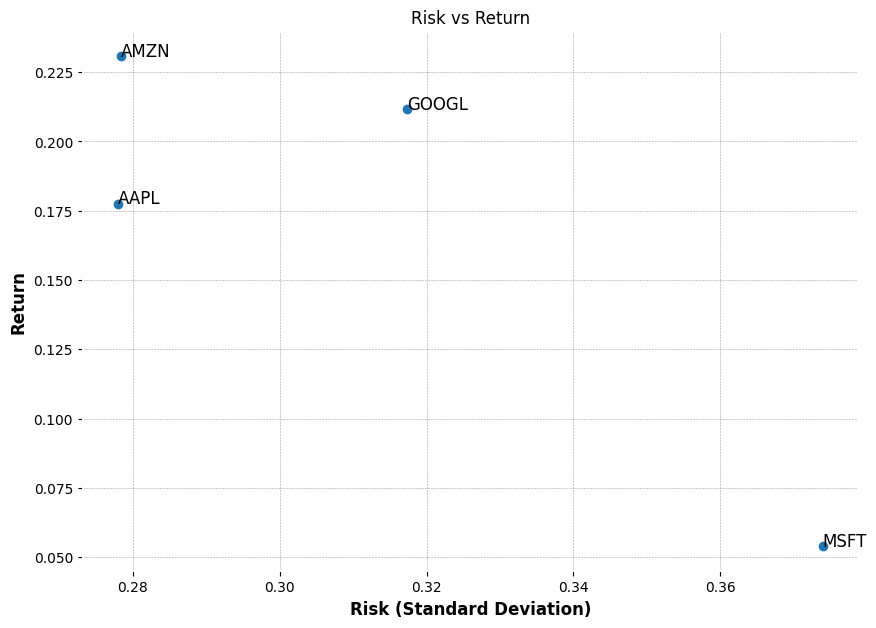

In [35]:

plt.figure(figsize=(10, 7))

risk = daily_returns.std() * np.sqrt(252)
returns = daily_returns.mean() * 252

plt.scatter(risk, returns)
for i, ticker in enumerate(tickers):
    plt.text(risk[i], returns[i], ticker, fontsize=12)
plt.title('Risk vs Return')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.grid(True)
plt.show()


# # Visualization 22: Portfolio Optimization (Efficient Frontier)

####


*   The Efficient Frontier plot shows the set of optimal portfolios that offer the highest expected return for a given level of risk.
*   This is a fundamental concept in portfolio management and helps investors choose the best risk-return combination.


####

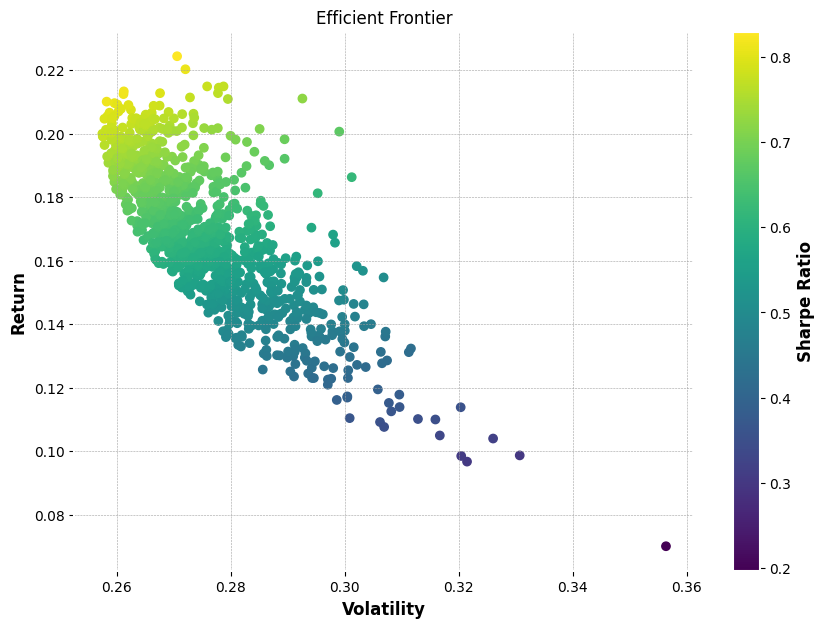

In [38]:
from scipy.optimize import minimize
# Calculate portfolio returns and risks
def portfolio_stats(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return portfolio_return, portfolio_stddev

def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_return, p_stddev = portfolio_stats(weights, mean_returns, cov_matrix)
    return - (p_return - risk_free_rate) / p_stddev

# Optimize the portfolio
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

num_assets = len(tickers)
args = (mean_returns, cov_matrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))
initial_guess = num_assets * [1. / num_assets,]

optimized_result = minimize(negative_sharpe_ratio, initial_guess, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
optimized_weights = optimized_result.x

# Plot efficient frontier
p_returns = []
p_volatility = []

for _ in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    p_return, p_vol = portfolio_stats(weights, mean_returns, cov_matrix)
    p_returns.append(p_return)
    p_volatility.append(p_vol)

p_returns = np.array(p_returns)
p_volatility = np.array(p_volatility)

plt.figure(figsize=(10, 7))
plt.scatter(p_volatility, p_returns, c=p_returns/p_volatility, marker='o')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.show()


# Visualization 23: Portfolio Allocation Bar Plot

####


*   This bar plot shows the proportion of each asset in the optimized portfolio.
*   It provides a clear visual of how much of your capital is allocated to each asset.


####

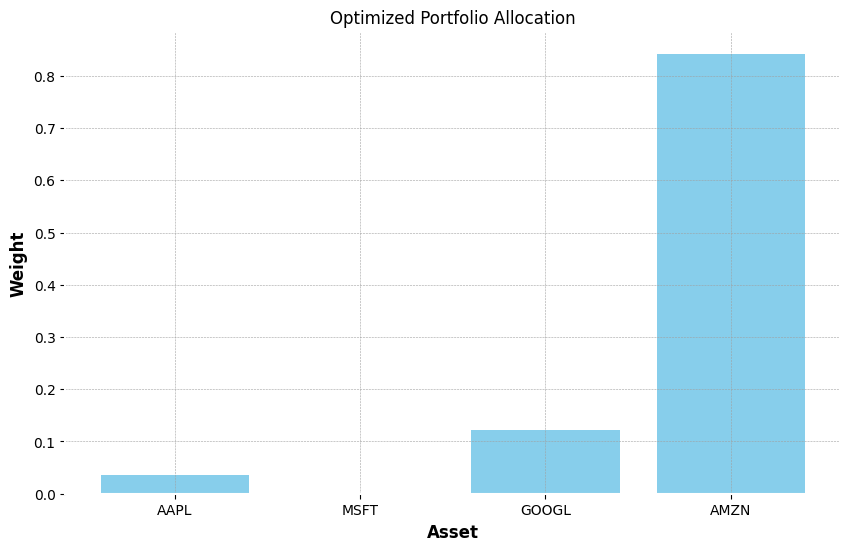

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(tickers, optimized_weights, color='skyblue')
plt.title('Optimized Portfolio Allocation')
plt.xlabel('Asset')
plt.ylabel('Weight')
plt.grid(True)
plt.show()


#Visualization 24: Expected return and volatility of the optimized portfolio

####


*   This calculation gives you the expected return and risk (volatility) of the portfolio that has been optimized.
*   It summarizes the performance of your optimized portfolio.


####

In [40]:
# Calculate expected return and volatility of the optimized portfolio
optimized_return, optimized_volatility = portfolio_stats(optimized_weights, mean_returns, cov_matrix)

# Display results
print(f"Optimized Portfolio Return: {optimized_return:.2f}")
print(f"Optimized Portfolio Volatility: {optimized_volatility:.2f}")


Optimized Portfolio Return: 0.23
Optimized Portfolio Volatility: 0.27


#Visualization 24: Risk and return of individual assets

####


*    This plot compares the risk and return of the optimized portfolio with the individual assets.
*   The optimized portfolio is marked with a red star, making it easy to see how it compares to the assets.


####

<ipython-input-47-684e2b21d564>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(asset_risks[i], asset_returns[i], ticker, fontsize=12)


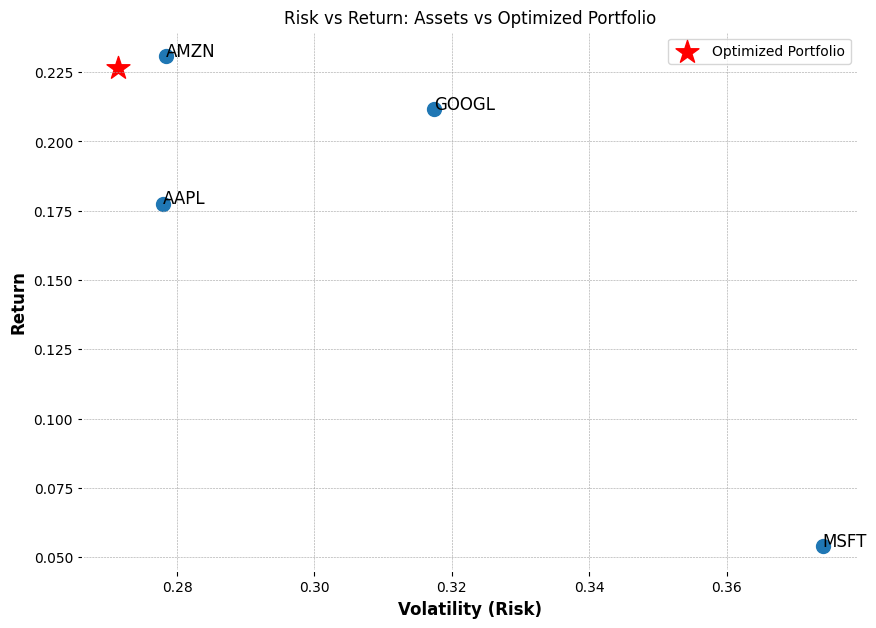

In [47]:
asset_returns = daily_returns.mean() * 252
asset_risks = daily_returns.std() * np.sqrt(252)

plt.figure(figsize=(10, 7))
plt.scatter(asset_risks, asset_returns, marker='o', s=100)
plt.scatter(optimized_volatility, optimized_return, color='red', marker='*', s=300, label='Optimized Portfolio')

for i, ticker in enumerate(tickers):
    plt.text(asset_risks[i], asset_returns[i], ticker, fontsize=12)

plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.title('Risk vs Return: Assets vs Optimized Portfolio')
plt.legend()
plt.grid(True)
plt.show()

# Calculate cumulative returns of the optimized portfolio

####

*   This plot shows how the value of the optimized portfolio would have grown over time.
*   It's useful for visualizing the performance of the portfolio in a historical context.


####

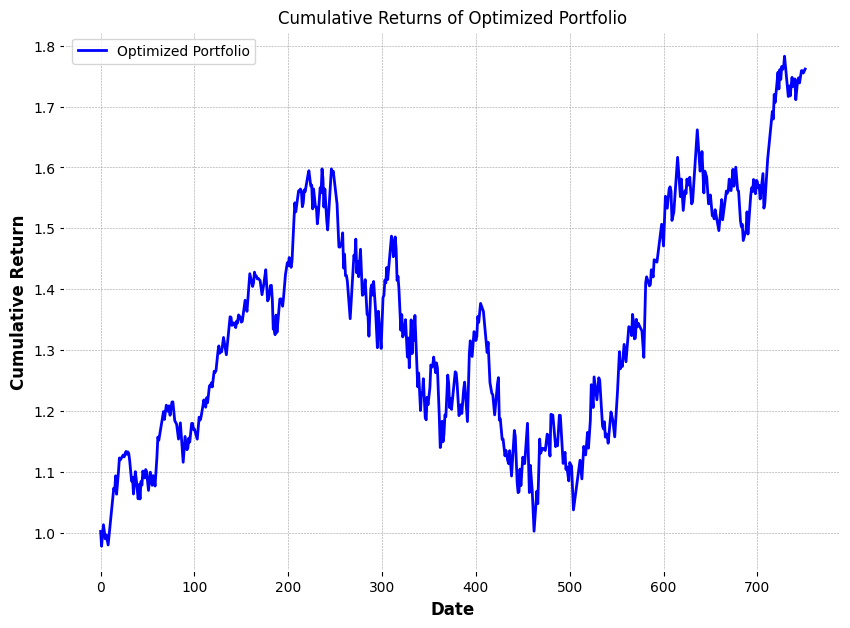

In [42]:
portfolio_daily_returns = np.dot(daily_returns, optimized_weights)
cumulative_returns = (1 + portfolio_daily_returns).cumprod()

plt.figure(figsize=(10, 7))
plt.plot(cumulative_returns, label='Optimized Portfolio', color='blue')
plt.title('Cumulative Returns of Optimized Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()


# Monte Carlo Simulation

####


*   This Monte Carlo simulation generates potential future paths for the portfolio's value over the next year.
*   It provides a range of outcomes, helping you understand the potential risks and rewards.


####

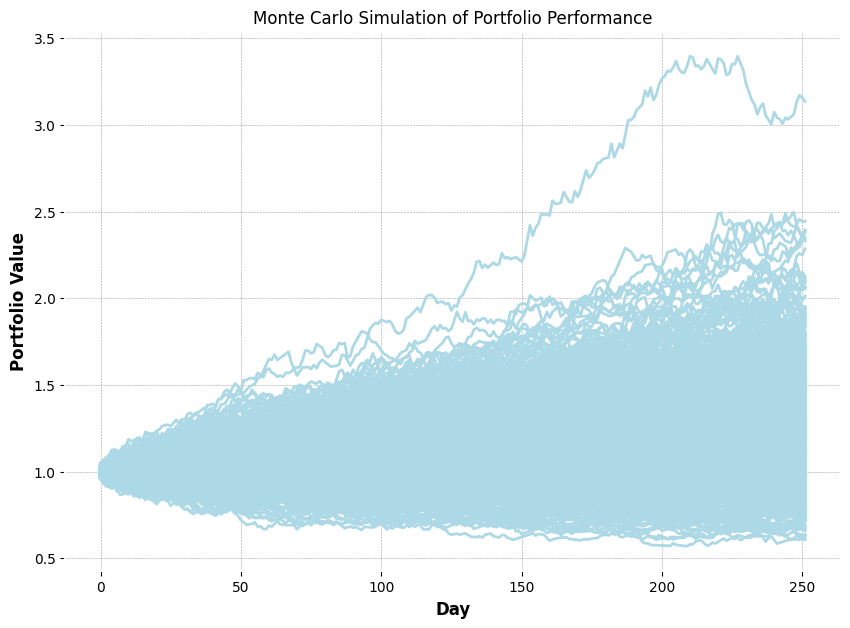

In [43]:

num_simulations = 1000
num_days = 252
simulation_results = np.zeros((num_simulations, num_days))

for i in range(num_simulations):
    simulated_daily_returns = np.random.normal(mean_returns, daily_returns.std(), (num_days, num_assets))
    simulated_portfolio_returns = np.dot(simulated_daily_returns, optimized_weights)
    simulation_results[i, :] = (1 + simulated_portfolio_returns).cumprod()

plt.figure(figsize=(10, 7))
plt.plot(simulation_results.T, color='lightblue')
plt.title('Monte Carlo Simulation of Portfolio Performance')
plt.xlabel('Day')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.show()




# Calculate drawdown

####


*   The drawdown plot shows the declines from the peak portfolio value.
*   It helps in understanding the risk of significant losses within the portfolio.

####

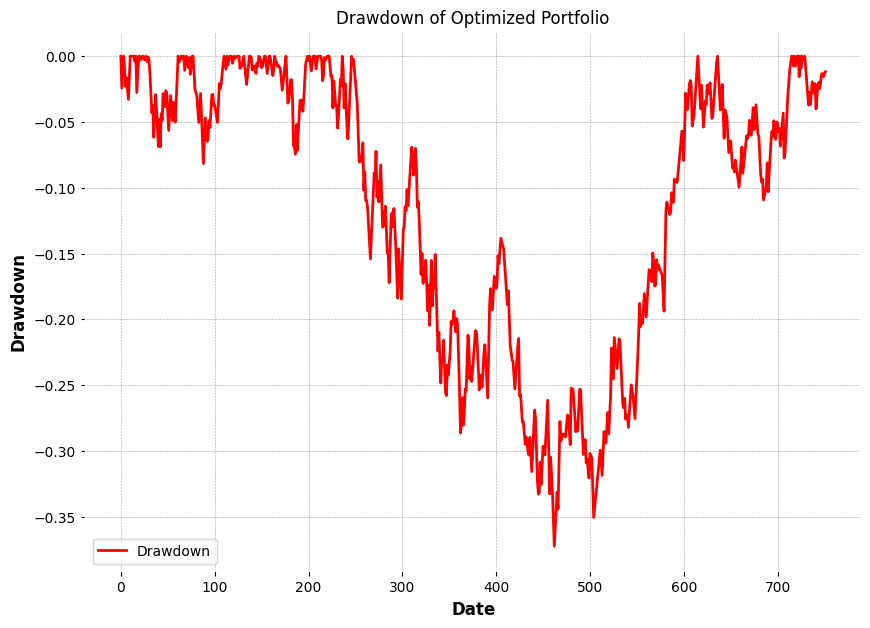

In [45]:

import pandas as pd

# Convert cumulative returns to a Pandas Series
cumulative_returns_series = pd.Series(cumulative_returns)

# Calculate drawdown
peak = cumulative_returns_series.cummax()
drawdown = (cumulative_returns_series - peak) / peak

plt.figure(figsize=(10, 7))
plt.plot(drawdown, color='red', label='Drawdown')
plt.title('Drawdown of Optimized Portfolio')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.legend()
plt.show()





# Correlation matrix

####


*   The correlation matrix heatmap shows how each asset in the portfolio is correlated with the others.
*   A strong correlation indicates that the assets tend to move together, while a weak or negative correlation suggests diversification.

####

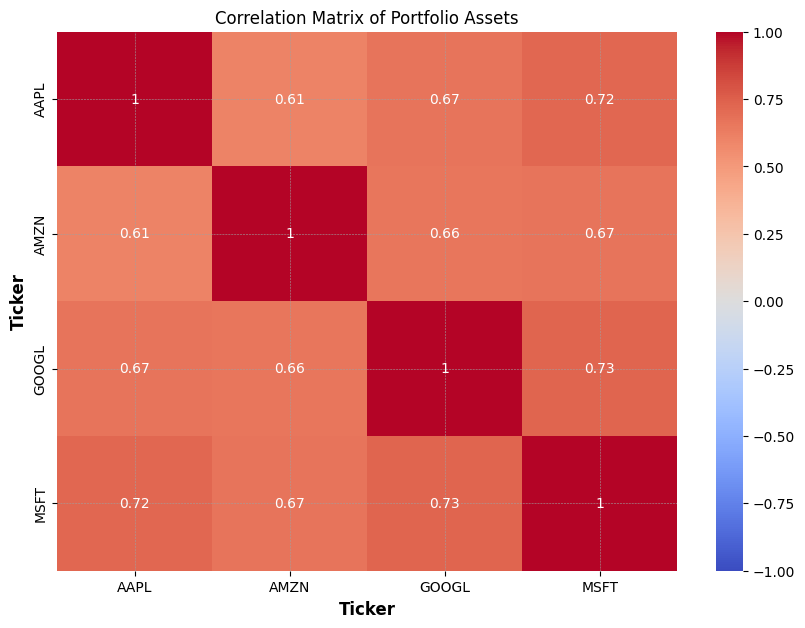

In [46]:
import seaborn as sns


plt.figure(figsize=(10, 7))
sns.heatmap(daily_returns.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Portfolio Assets')
plt.show()

